<a href="https://colab.research.google.com/github/zaiii145/Task1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

/tmp/ipython-input-1-6943389.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-6943389.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

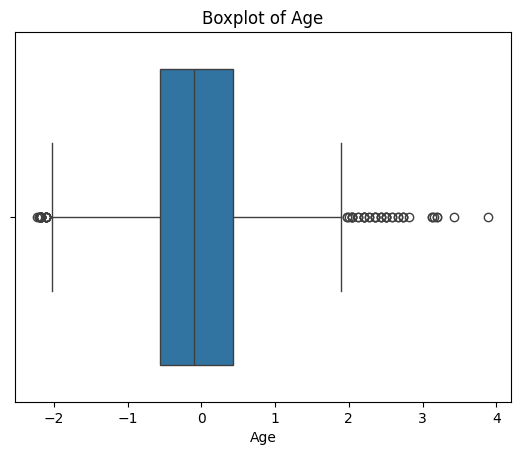

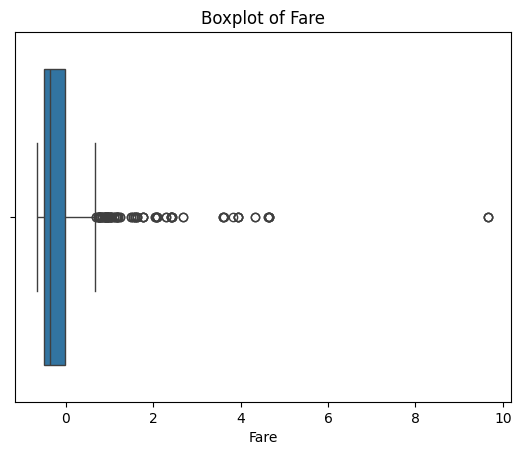

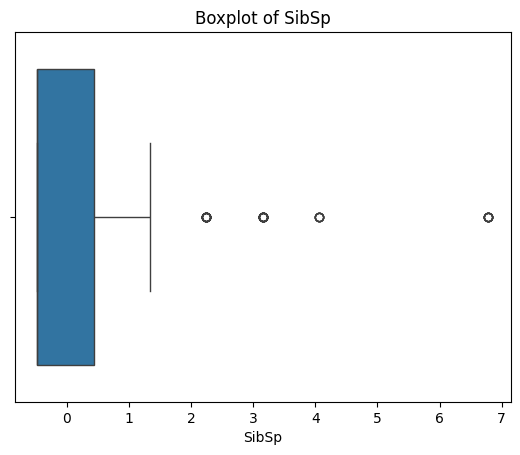

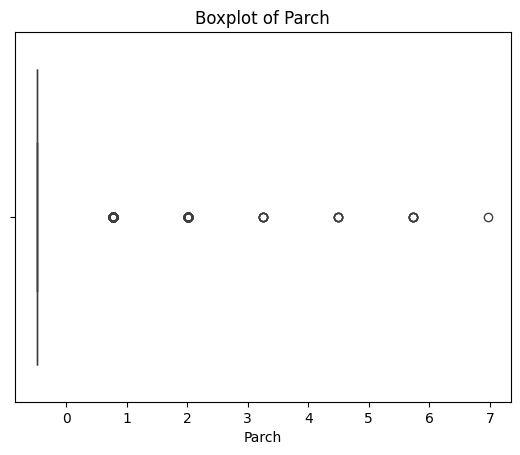


Cleaned Data Preview:
    Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Cabin  \
0         0       3    1 -0.565736  0.432793 -0.473674 -0.502445      0   
2         1       3    0 -0.258337 -0.474545 -0.473674 -0.488854      0   
3         1       1    0  0.433312  0.432793 -0.473674  0.420730      1   
4         0       3    1  0.433312 -0.474545 -0.473674 -0.486337      0   
5         0       3    1 -0.104637 -0.474545 -0.473674 -0.478116      0   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  

Cleaned Data Info:

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    577 non-null    int64  
 1   Pclass      577 non-null    int64  
 2   Sex         577 non-null    int64  
 3   Age         577 non-null  

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_excel('Titanic-Dataset.xlsx')

# 1. Basic Info
print("First 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

# 2. Handling Missing Values
# Filling numerical columns with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling categorical column with mode
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping rows if too many missing values (if needed)
# df.dropna(axis=0, inplace=True)

# 3. Encoding Categorical Variables
# Label Encoding for binary categories
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male:1, female:0

# One-Hot Encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Optional: encode 'Cabin' to count unique cabins
df['Cabin'] = df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)

# 4. Normalization / Standardization
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 5. Detect and Remove Outliers (Using IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Boxplot visualization
for col in numerical_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers for all numerical columns
for col in numerical_features:
    df = remove_outliers_iqr(df, col)

# Final cleaned dataset
print("\nCleaned Data Preview:\n", df.head())
print("\nCleaned Data Info:\n")
df.info()
